In [ ]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('data_moods.csv')

In [ ]:
# Examine distributions
for col in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Check balance of categories (moods)
sns.countplot(x='mood', data=df)
plt.title('Distribution of Moods')
plt.show()

# Data Cleaning

In [ ]:
# Handling missing values
df = df.dropna()  # or df.fillna(method='ffill')

# Handling outliers (example for 'tempo' feature)
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['tempo'] < (Q1 - 1.5 * IQR)) | (df['tempo'] > (Q3 + 1.5 * IQR)))]


In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Select only numeric columns for scaling
numeric_features = df.select_dtypes(include=[np.number])

# If 'mood' is a non-numeric column, ensure it's not in the features
if 'mood' in numeric_features.columns:
    numeric_features = numeric_features.drop('mood', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
scaled_features = scaler.fit_transform(numeric_features)

In [ ]:
 # Creating a new feature combining tempo and energy
df['tempo_energy'] = df['tempo'] * df['energy']
df

In [ ]:
# After scaling the numeric features
feature_names = numeric_features.columns

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(scaled_features, df['mood'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [54]:
# Baseline Model (K-NN):

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Validate
y_pred_val = knn.predict(X_val)
print(classification_report(y_val, y_pred_val))


              precision    recall  f1-score   support

        Calm       0.81      0.96      0.88        23
   Energetic       0.46      0.58      0.51        19
       Happy       0.59      0.50      0.54        20
         Sad       0.91      0.76      0.83        38

    accuracy                           0.72       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.74      0.72      0.72       100



In [55]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.734 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.755 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.798 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.806 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.787 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.777 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.766 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.809 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.763 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.830 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;,

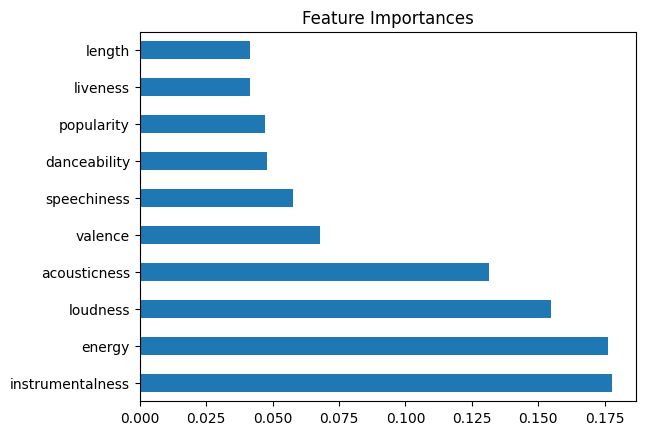

In [56]:
# Visualisation (Random Forest)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()